# Predicting Car Prices 

Goal is to practice the ML workflow 

In [1]:
import pandas as pd
import numpy as np
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars=pd.read_csv('imports-85.data',names=cols)

In [2]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

['price'] is the target column. 

['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'] are continuous values as seen from the database description.

It looks like some values have '?' as an entry instead of null. Lets check our null values. Also lets convert all to type float.

In [4]:
cont_car=cars[['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].copy()
cont_car.replace('?',np.nan,inplace=True)
cont_car=cont_car.astype(float)
cont_car.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We will want to remove all rows with a null 'price' value. Our model can't take null values at all so we will replace other null values with column means.

In [5]:
cont_car.dropna(subset=['price'],inplace=True)
cont_car=cont_car.apply(lambda x:x.fillna(x.mean()))
cont_car.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now rescale all values to be contained in [0,1]

In [6]:
norm_cont_car=cont_car.copy()
norm_cont_car=(norm_cont_car-norm_cont_car.min())/(norm_cont_car.max()-norm_cont_car.min())
norm_cont_car['price']=cont_car['price']

# Univariate Model

Test all possible univariate models. 50/50 split on test/train. RMSE.

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(df,features,target):
    
    np.random.seed(1)
    df=df.iloc[np.random.permutation(len(df))].copy()
    
    split=int(len(df)/2)
    train=df[:split].copy()
    test=df[split:].copy()
    
    knn=KNeighborsRegressor()
    knn.fit(train[features],train[target])
    p=knn.predict(test[features])
    
    return mean_squared_error(test[target],p)**.5

all_features=norm_cont_car.columns.drop('price')
univar=[[i,knn_train_test(norm_cont_car,[i],'price')] for i in all_features]
univar.sort(key=lambda x: x[1])
univar

[['engine-size', 3238.4628296477176],
 ['horsepower', 4037.0377131537603],
 ['curb-weight', 4401.118254793124],
 ['highway-mpg', 4630.026798588056],
 ['width', 4704.482589704386],
 ['city-mpg', 4766.422505090134],
 ['length', 5427.2009608367125],
 ['wheel-base', 5461.553997873057],
 ['compression-rate', 6610.812153159129],
 ['bore', 6780.627784685976],
 ['normalized-losses', 7330.197653434445],
 ['peak-rpm', 7697.4596964334805],
 ['stroke', 8006.529544647101],
 ['height', 8144.441042663747]]

Looks like 'engine-size' performed the best. Now let's modify the function to accept a parameter, k, the number of neighbors.

In [8]:
def knn_train_test(df,features,target,k):
    
    np.random.seed(1)
    df=df.iloc[np.random.permutation(len(df))].copy()
    
    split=int(len(df)/2)
    train=df[:split].copy()
    test=df[split:].copy()
    
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(train[features],train[target])
    p=knn.predict(test[features])
    
    return mean_squared_error(test[target],p)**.5

results=[]
for i in all_features:
    for k in [1,3,5,7,9]:
        results.append([i,k,knn_train_test(norm_cont_car,[i],'price',k)])
results

[['normalized-losses', 1, 7846.750605148984],
 ['normalized-losses', 3, 7500.5698123109905],
 ['normalized-losses', 5, 7330.197653434445],
 ['normalized-losses', 7, 7756.421586234123],
 ['normalized-losses', 9, 7688.096096891432],
 ['wheel-base', 1, 4493.734068810494],
 ['wheel-base', 3, 5120.161506064513],
 ['wheel-base', 5, 5461.553997873057],
 ['wheel-base', 7, 5448.1070513823315],
 ['wheel-base', 9, 5738.405685192312],
 ['length', 1, 4628.45550121557],
 ['length', 3, 5129.8358210721635],
 ['length', 5, 5427.2009608367125],
 ['length', 7, 5313.427720847974],
 ['length', 9, 5383.054514833446],
 ['width', 1, 4559.257297950061],
 ['width', 3, 4606.413692169901],
 ['width', 5, 4704.482589704386],
 ['width', 7, 4571.485046194653],
 ['width', 9, 4652.914172067787],
 ['height', 1, 8904.04645636071],
 ['height', 3, 8277.609643045525],
 ['height', 5, 8144.441042663747],
 ['height', 7, 7679.598124393773],
 ['height', 9, 7811.03606291223],
 ['curb-weight', 1, 5264.290230758878],
 ['curb-weight

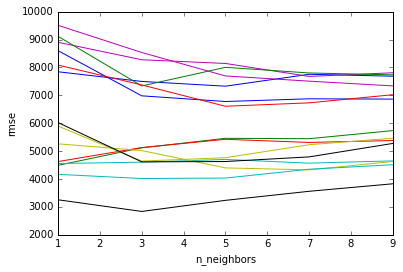

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

x=[]
y=[]
for i in range(len(results)):
    x.append(results[i][1])
    y.append(results[i][2])
    if i%5==4:
        plt.plot(x,y)
        x=[]
        y=[]
    
plt.ylabel('rmse')
plt.xlabel('n_neighbors')

Looks like k=3 and k=5 produced the best results for most. Now lets look at a Multivariate Model.

# Multivariate Model

Use all of the columns

In [10]:
knn_train_test(
    norm_cont_car,
    all_features,
    'price',
    5)

3726.6377183145073

Now use 2 best, 3 best, 4 best, and 5 best columns

In [11]:
multi={}
for i in range(2,6):
    
    multi[str(i)+' best features']=knn_train_test(
        norm_cont_car,
        [univar[j][0] for j in range(i)],
        'price',
        5)
multi

{'2 best features': 2949.8817277180374,
 '3 best features': 3435.2601095401815,
 '4 best features': 3286.5597353252815,
 '5 best features': 3410.2170133901805}

Now adjust hyperparameters for these results and visualize

In [12]:
final=[]
for i in range(2,6):
    for k in range(1,26):
        final.append([i,k,knn_train_test(
                            norm_cont_car,
                            [univar[j][0] for j in range(i)],
                            'price',
                            k)])        
final

[[2, 1, 2783.6204237227344],
 [2, 2, 2657.7963807419765],
 [2, 3, 2792.586573031673],
 [2, 4, 2891.5329686923255],
 [2, 5, 2949.8817277180374],
 [2, 6, 3096.402601694776],
 [2, 7, 3164.681969020496],
 [2, 8, 3413.228359192009],
 [2, 9, 3748.6716603306486],
 [2, 10, 4080.7125057341937],
 [2, 11, 4215.6372280600335],
 [2, 12, 4275.421524277872],
 [2, 13, 4373.901683035496],
 [2, 14, 4424.285137239815],
 [2, 15, 4539.505493095937],
 [2, 16, 4667.307671446768],
 [2, 17, 4729.605305844226],
 [2, 18, 4790.556632159094],
 [2, 19, 4824.3866193292615],
 [2, 20, 4840.850914693829],
 [2, 21, 4837.429062000271],
 [2, 22, 4831.16988267597],
 [2, 23, 4861.679492959275],
 [2, 24, 4903.346008862579],
 [2, 25, 4955.892429427362],
 [3, 1, 3131.798233957262],
 [3, 2, 3005.5737903777945],
 [3, 3, 3016.72346189447],
 [3, 4, 3144.445503247916],
 [3, 5, 3435.2601095401815],
 [3, 6, 3490.638342356411],
 [3, 7, 3734.328302612299],
 [3, 8, 3936.1203798667007],
 [3, 9, 3976.4878693193755],
 [3, 10, 4124.27772390

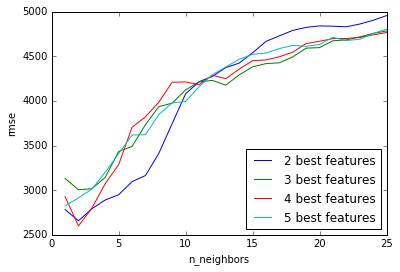

In [13]:
#Visualize
x=[]
y=[]
for i in range(len(final)):
    x.append(final[i][1])
    y.append(final[i][2])
    if i%25==24:
        label=str(final[i][0])+' best features'
        plt.plot(x,y,label=label)
        x=[]
        y=[]
    
plt.ylabel('rmse')
plt.xlabel('n_neighbors')
plt.legend(loc='lower right')

Looks like 4 best features at k=2 performed the best.